This MDP is the model of skill acquisition, not the object level (game level) MDP.
$$M_{skill} = (S, A, T, \gamma, r)$$
The states $S$ contains 2 skills, and $m$ means the there are m subskills to complish one skill. It means, if the skill is totally learned, $\frac{m}{k} = 1$,  $$S = \{(\frac{m1}{k_1}, \frac{m2}{k_2}):k_1 \in \{1, 2, ..., K_1\}, k_2 \in \{1, 2, ..., K_2\}, m_1 \in \{1, 2, ..., K_1\}, m_2 \in \{1, 2, ..., k_2\}\}$$
in which, $K$ is the possible solution sets and $m$ is the right solutions among the solution sets.
The action space is $$A = {1, 2}$$ means to choose to learn or use skill 1 or 2.
The transition function:

$$P(s_t = (\frac{m_1}{k_1 - d_1}, \frac{m_2}{k_2 - d_2}), a=1, s_{t+1} = (1, \frac{m_2}{k_2-d_2})|(\frac{m_1}{k_1}, \frac{m_2}{k_2}), d_1, d_2) = \frac{m_1}{k_1-d_1}$$

$$P(s_t = (\frac{m_1}{k_1 - d_1}, \frac{m_2}{k_2 - d_2}), a=1, s_{t+1} = (\frac{m_1}{k_1- d_1 - 1}, \frac{m_2}{k_2-d_2})|(\frac{m_1}{k_1}, \frac{m_2}{k_2}), d_1, d_2) = 1 - \frac{m_1}{k_1-d_1}$$

$$P(s_t = (\frac{m_1}{k_1 - d_1}, \frac{m_2}{k_2 - d_2}), a=2, s_{t+1} = (\frac{m_1}{k_1-d_1}, 1)|(\frac{m_1}{k_1}, \frac{m_2}{k_2}), d_1, d_2) = \frac{m_2}{k_2-d_2}$$

$$P(s_t = (\frac{m_1}{k_1 - d_1}, \frac{m_2}{k_2 - d_2}), a=2, s_{t+1} = (\frac{m_1}{k_1-d_1}, \frac{m_2}{k_2-d_2})|(\frac{m_1}{k_1}, \frac{m_2}{k_2}), d_1, d_2) = 1 - \frac{m_2}{k_2-d_2}$$

in which the probability of choosing action 1 and the next state being $(1, \frac{m_2}{k_2})$ is $\frac{m_1}{k_1-d_1}$, when the agent successfully get one of the subskills of skill 1. 
If the agent tried one key out without success, the probability of choosing action 1 and the next state being $(\frac{m_1}{k_1-d_1-1}, \frac{m_2}{k_2-d_2})$ is $1 - \frac{m_1}{k_1-d_1}$

Generally, we can say the transition probability of choosing action 1 like the form cross entropy? 

$y(\frac{m_1}{k_1-d_1}) + (1-y)(1 - \frac{m_1}{k_1-d_1})$


The reward function:

$$r((\frac{m_1}{k_1-d_1}, \frac{m_2}{k_2-d_2}), 1, (1, \frac{m_2}{k_2})) = g - d_1$$

$$r((\frac{m_1}{k_1-d_1}, \frac{m_2}{k_2-d_2}), 1, (\frac{m_1}{k_1-d_1-1}, \frac{m_2}{k_2})) = -1$$

$$r((\frac{m_1}{k_1-d_1}, \frac{m_2}{k_2-d_2}), 2, (\frac{m_1}{k_1}, 1)) = g - d_2$$

$$r((\frac{m_1}{k_1-d_1}, \frac{m_2}{k_2-d_2}), 2, (\frac{m_1}{k_1}, \frac{m_2}{k_2-d_2-1})) = -1$$

What are the stations and the transition probabilities if the skill is a combined skill, it means it needs to have multiple manipulations? Or else let's just keep m1 and m2 as 1:)
And How about continuous states? 

### action value of practice
$Q_p$ is the action value of practice, the formular describes the action value of practice $Q_p$ at the state $\frac{m1}{k1-d1}$ with the action 1. 

$$Q_p(\frac{m1}{k1-d1}, 1) = \frac{m1}{k1-d1}((g-d1) + \gamma V[1]) + (1 - \frac{m1}{k1-d1})(-1 + \gamma \max{a\prime}Q_p(\frac{m1}{k1-d1}, a\prime)) - Q_s(\frac{m1}{k1-d1}, 1)$$

in which $Q_s$ is the action value of skill:

$$Q_s(\frac{m1}{k1-d1}, 1) = g\lfloor{\frac{1}{(1-\gamma)d1}}\rfloor - \frac{1}{1- \gamma}$$

In [1]:
import numpy as np

In [2]:
nS1 = 27
nS2 = 20
g = 100 # goal
gamma = 0.9
states = [(x, y) for x in range(nS1) for y in range(nS2)]
actions = [1, 2]

In [3]:
def step(cur_state):
    d1, d2 = cur_state
    
    if d1 < (nS1 - 1) and d2 < (nS2 - 1):
        next_states = [(d1+1, d2),(d1, d2+1)]
        
    elif d1 == (nS1 - 1) and d2 != (nS2 - 1):
        next_states = [(d1, d2), (d1, d2+1)]
        
    elif d1 != (nS1 - 1) and d2 == (nS2 - 1):
        next_states = [(d1+1, d2), (d1, d2)]
        
    elif d1 == (nS1 - 1) and d2 == (nS2 - 1):
        next_states = [(d1, d2), (d1, d2)]
        
    return next_states  

In [4]:
def skill_action_value(state, g, gamma):
    d1, d2 = state
    q_s_values = [(g*np.floor(1/((1-gamma)*(d1 + 1))) - 1/(1-gamma)), (g*np.floor(1/((1-gamma)*(d2 + 1))) - 1/(1-gamma))]
    return q_s_values

In [10]:
def policy_evaluation(policy, gamma, vos, v_sequence):
    
    V = {} 
    for state in states:
        V[state] = 0
    
    iteration = 0
    while True:
        delta = 0
        
        for state in states:
            d1, d2 = state
            v = 0
            action_prob1 = policy[state][0]
            action_prob2 = policy[state][1]
#             print("action_probs: {}, {}".format(action_prob1, action_prob2))
            next_states = step(state)
            q_s_values = skill_action_value(state, g, gamma)
            if vos:
                v = action_prob1 * \
                            ((1/(nS1 - d1))*((g - d1) + gamma*V[(nS1-1, d2)]) +\
                             (1 - 1/(nS1 - d1))*(-1 + gamma*V[next_states[0]]) - \
                             q_s_values[0]) +\
                    action_prob2 * \
                            ((1/(nS2 - d2))*((g - d2) + gamma*V[(d1, nS2-1)]) +\
                             (1 - 1/(nS2 - d2))*(-1 + gamma*V[next_states[1]]) - \
                            q_s_values[1])
            else:
                v = action_prob1 * \
                            ((1/(nS1 - d1))*((g - d1) + gamma*V[(nS1-1, d2)]) +\
                             (1 - 1/(nS1 - d1))*(-1 + gamma*V[next_states[0]])) +\
                    action_prob2 * \
                            ((1/(nS2 - d2))*((g - d2) + gamma*V[(d1, nS2-1)]) +\
                             (1 - 1/(nS2 - d2))*(-1 + gamma*V[next_states[1]]))
                
            delta = max(delta, np.abs(V[state] - v))
            V[state] = v
        
        v_sequence.append(V.copy())
        iteration += 1
#         print("delta: {}".format(delta))
        if delta < 1e-4:
            print("iteration: {}".format(iteration))
            print("number of changed V: {}".format(len(v_sequence)))
#             print(v_sequence[0])
#             print(v_sequence[1])
            break
    return V

In [11]:
def one_step_lookahead(state, V, gamma, vos):
    d1, d2 = state
    A = np.zeros(len(actions))
    next_states = step(state)
    q_s_values = skill_action_value(state, g, gamma)
    
    for action in range(len(A)):
        if action == 0:
            if vos:
                A[action] = (1/(nS1 - d1))*((g - d1) + gamma*V[(nS1-1, d2)]) +\
                            (1 - 1/(nS1 - d1))*(-1 + gamma*V[next_states[0]]) - \
                            q_s_values[0]
            else:
                A[action] = (1/(nS1 - d1))*((g - d1) + gamma*V[(nS1-1, d2)]) +\
                            (1 - 1/(nS1 - d1))*(-1 + gamma*V[next_states[0]])
                
        elif action == 1:
            if vos:
                A[action] = (1/(nS2 - d2))*((g - d2) + gamma*V[(d1, nS2-1)]) +\
                            (1 - 1/(nS2 - d2))*(-1 + gamma*V[next_states[1]]) -\
                            q_s_values[1]
            else:
                A[action] = (1/(nS2 - d2))*((g - d2) + gamma*V[(d1, nS2-1)]) +\
                            (1 - 1/(nS2 - d2))*(-1 + gamma*V[next_states[1]])
                
        else:
            raise ValueError
    return A       

In [12]:
def policy_iteration(gamma, vos=True):
    policy = {} 
    for state in states: 
        policy[state] = np.ones(len(actions))/len(actions)

    v_sequence = []
    
    while True:
        
        V = policy_evaluation(policy, gamma, vos, v_sequence)

        policy_stable = True
        policy_change = 0
        
        for state in states:
            chosen_a = np.argmax(policy[state])
            action_values = one_step_lookahead(state, V, gamma, vos)
#             print("action_values: {}".format(action_values))
            best_action = np.argmax(action_values)
            if best_action != chosen_a:
                policy_change += 1
                policy_stable = False
            policy[state] = np.eye(len(actions))[best_action]
        print("policy change in {} states".format(policy_change))
        if policy_stable:
            return policy, V, v_sequence

In [13]:
def reshape_optimal(vos, gamma, nS1, nS2, policy_improve=policy_iteration):
    policy, V, v_sequence = policy_improve(gamma, vos)
    optimal_policy = np.zeros((nS1, nS2))
    optimal_V = np.zeros((nS1, nS2))
    for state, action_values in policy.items():
        d1, d2 = state
        optimal_policy[d1, d2] = np.argmax(action_values)
        optimal_V[d1, d2] = V[state]
    return np.array(optimal_policy), np.array(optimal_V), v_sequence

In [14]:
optimal_policy, optimal_V, v_sequence = reshape_optimal(False, gamma, nS1, nS2)

iteration: 130
number of changed V: 130
policy change in 367 states
iteration: 131
number of changed V: 261
policy change in 13 states
iteration: 131
number of changed V: 392
policy change in 0 states


In [15]:
optimal_policy_vos, optimal_V_vos, v_sequence_vos = reshape_optimal(True, gamma, nS1, nS2)

iteration: 131
number of changed V: 131
policy change in 290 states
iteration: 132
number of changed V: 263
policy change in 9 states
iteration: 132
number of changed V: 395
policy change in 0 states


### 2D Visualization

In [16]:
%matplotlib inline

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

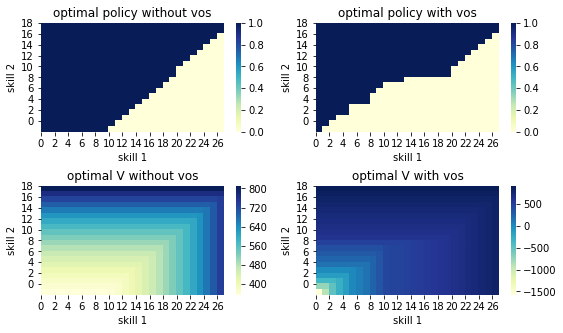

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(8, 5))
plt.subplots_adjust(hspace=0.5, right=1)

data = [optimal_policy, optimal_policy_vos, optimal_V, optimal_V_vos]
titles = ["optimal policy without vos", "optimal policy with vos", "optimal V without vos", "optimal V with vos"]
for i, ax in enumerate(axs.flatten()):
    fig = sns.heatmap(np.rot90(data[i]), cmap="YlGnBu", ax=ax)
    fig.set_title(titles[i])
    fig.set_xlabel("skill 1")
    fig.set_ylabel("skill 2")
    fig.set_xticks(list(range(0, nS1, 2)))
    fig.set_yticks(list(reversed(range(0, nS2, 2))))
    
# TODO: check the formular and correct them, adjust the states, explain the d1, d2, change the probabilities formulations!!!!

### 3D Visualization

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

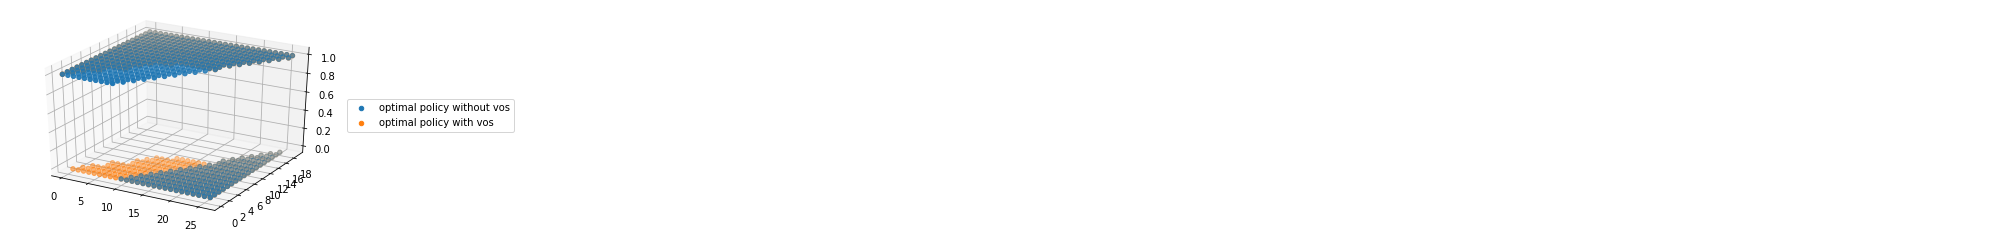

In [20]:
# 3d plots
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
ax.set_yticks(list(reversed(range(0, nS2, 2))))
x = np.arange(nS1)
y = np.arange(nS2)
x, y = np.meshgrid(x, y)
z1 = optimal_policy.T
z2 = optimal_policy_vos.T
scatter1 = ax.scatter(x, y, z1, label="optimal policy without vos")
scatter2 = ax.scatter(x, y, z2, label="optimal policy with vos")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0.5, 0.92, 'optimal V')

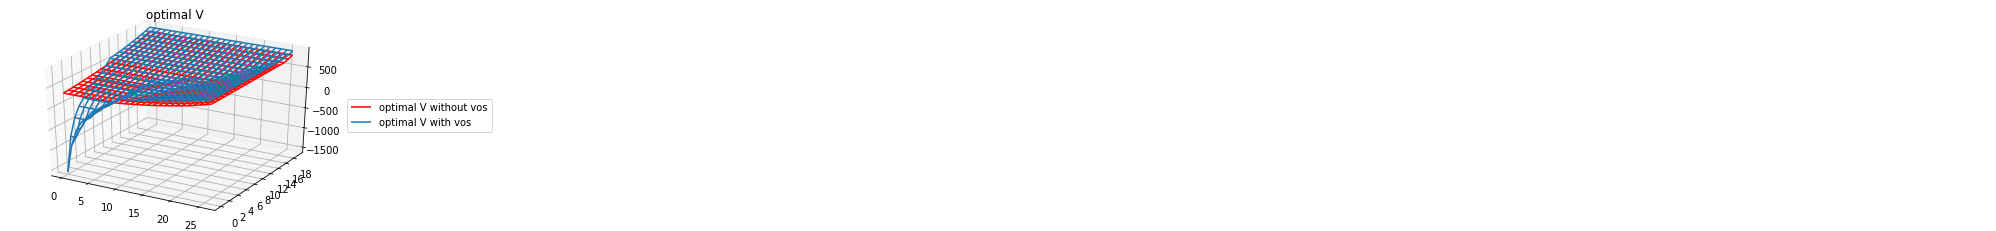

In [21]:
# 3d plots

fig = plt.figure(figsize=(6, 4))
ax = fig.gca(projection='3d')
ax.set_yticks(list(reversed(range(0, nS2, 2))))


x = np.arange(nS1)
y = np.arange(nS2)
x, y = np.meshgrid(x, y)

z1 = optimal_V.T
z2 = optimal_V_vos.T

wireframe1 = ax.plot_wireframe(x, y, z1, color= "red", label="optimal V without vos")
wireframe2 = ax.plot_wireframe(x, y, z2, label="optimal V with vos")

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title("optimal V")

### animated value states

In [35]:
v_sequence_snippet = v_sequence

In [36]:
v_sequence_reshape = []
_v = np.zeros((nS1, nS2))
for v in v_sequence_snippet:
    for state, value in v.items():
        d1, d2 = state
        _v[d1, d2] = value
    v_sequence_reshape.append(_v.copy())

(27, 20)


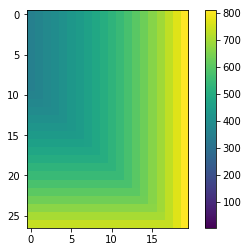

In [39]:
import matplotlib.animation as animation
from IPython.display import HTML

fig = plt.figure()


def f(i):
    return v_sequence_reshape[i]

i = 0

print(f(i).shape)

vmin = min(np.min(seq) for seq in v_sequence_reshape)
vmax = max(np.max(seq) for seq in v_sequence_reshape)


im = plt.imshow(f(i), animated=True, vmin=vmin, vmax=vmax)
plt.colorbar()


def updatefig(i):
    im.set_array(f(i))
    return im,

ani = animation.FuncAnimation(fig, updatefig, len(v_sequence_reshape) - 1, interval=50, blit=True)
HTML(ani.to_html5_video())

In [ ]:
def do_things():
    sequence = []
    for i in range(3):
        add_sequence(sequence)
    return sequence

def add_sequence(sequence):
    for i in range(20):
        value = i
        sequence.append(value)
    return sequence
    

In [ ]:
do_things()